In [94]:
import numpy as np
import pandas as pd

In [96]:
df = pd.read_csv('Nat_Gas.csv')

In [98]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


Here, we employ machine learning technique of multiple linear regression in form Price = (A x Days) + (B x sin(Time)) + (C x cos(Time)) + intercept as this data is locally sinusoidal for each year as the seasons change but the peaks linearly increase. This is linear wrt the constants A, B and C which we are trying to find.

In [101]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
start_date = df['Dates'].min()
df['Days'] = (df['Dates'] - start_date).dt.days

In [107]:
df['sin_time'] = np.sin(2 * np.pi * df['Days'] / 365.25)
df['cos_time'] = np.cos(2 * np.pi * df['Days'] / 365.25)

In [109]:
X = df[['Days', 'sin_time', 'cos_time']]
y = df['Prices']

In [111]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [113]:
y_predictions = model.predict(X)
accuracy_score = r2_score(y, y_predictions)

print(f'Model Accuracy (R-squared): {accuracy_score:.4f}')

Model Accuracy (R-squared): 0.9283


The model expects a matrix for n samples of these independent variables so we get a column array of prediction values with the rest being 0 after the zeroth index. Hence, we take the zeroth index value of the prediction to get the price we want.


In [116]:
def gas_price(date):
    corrected_date = pd.to_datetime(date)
    days = (corrected_date - start_date).days

    sin_val = np.sin(2 * np.pi * days / 365.25)
    cos_val = np.cos(2 * np.pi * days / 365.25)

    indep_vars_df = pd.DataFrame([[days, sin_val, cos_val]], columns = ['Days', 'sin_time', 'cos_time'])
    prediction = model.predict(indep_vars_df)
    
    return prediction[0]   

In [118]:
future_dates = pd.date_range(start=start_date, periods = int(5*365.25), freq = 'D')
predicted_prices = [gas_price(d) for d in future_dates]

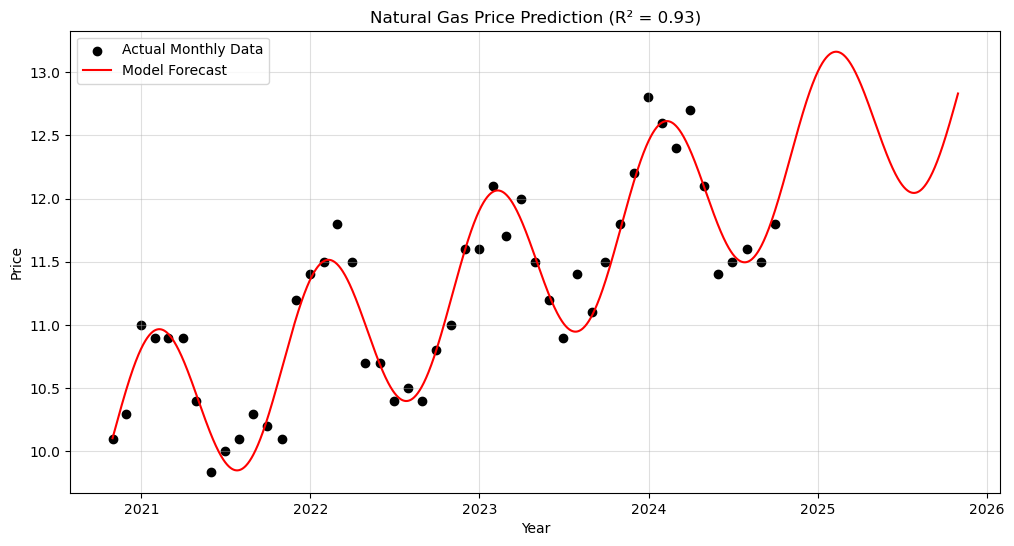

In [124]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Dates'], df['Prices'], color='black', label='Actual Monthly Data')
plt.plot(future_dates, predicted_prices, color='red', label='Model Forecast')

plt.title(f'Natural Gas Price Prediction (R² = {accuracy_score:.2f})')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

In [122]:
# Estimated price values for a date in the past (interpolation) and a date in the future (1 year extrapolation)

past_date = '05-25-21'
future_date = '09-30-25'

print(f"Price on {past_date}: {gas_price(past_date):.2f}")
print(f"Price on {future_date}: {gas_price(future_date):.2f}")

Price on 05-25-21: 10.19
Price on 09-30-25: 12.45
